In [1]:
import pandas as pd
import numpy as np

# Student's Final Grade Prediction

## Introduction

The material for this mini-project is taken from [Here](https://archive.ics.uci.edu/ml/datasets/student+performance). The objective is to gain insight into the problems of low scoring students and construct a machine learning model to predict their final grade (third period grade).

## Attribute Information

- **school** - student's school *(binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)*
- **sex** - student's sex *(binary: "F" - female or "M" - male)*
- **age** - student's age *(numeric: from 15 to 22)*
- **address** - student's home address type *(binary: "U" - urban or "R" - rural)*
- **famsize** - family size *(binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)*
- **Pstatus** - parent's cohabitation status *(binary: "T" - living together or "A" - apart)*
- **Medu** - mother's education *(numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)*
- **Fedu** - father's education *(numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)*
- **Mjob** - mother's job *(nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")*
- **Fjob** - father's job *(nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")*
- **reason** - reason to choose this school *(nominal: close to "home", school "reputation", "course" preference or "other")*
- **guardian** - student's guardian *(nominal: "mother", "father" or "other")*
- **traveltime** - home to school travel time *(numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)*
- **studytime** - weekly study time *(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)*
- **failures** - number of past class failures *(numeric: n if 1<=n<3, else 4)*
- **schoolsup** - extra educational support *(binary: yes or no)*
- **famsup** - family educational support *(binary: yes or no)*
- **paid** - extra paid classes within the course subject (Math or Portuguese) *(binary: yes or no)*
- **activities** - extra-curricular activities *(binary: yes or no)*
- **nursery** - attended nursery school *(binary: yes or no)*
- **higher** - wants to take higher education *(binary: yes or no)*
- **internet** - Internet access at home *(binary: yes or no)*
- **romantic** - with a romantic relationship *(binary: yes or no)*
- **famrel** - quality of family relationships *(numeric: from 1 - very bad to 5 - excellent)*
- **freetime** - free time after school *(numeric: from 1 - very low to 5 - very high)*
- **goout** - going out with friends *(numeric: from 1 - very low to 5 - very high)*
- **Dalc** - workday alcohol consumption *(numeric: from 1 - very low to 5 - very high)*
- **Walc** - weekend alcohol consumption *(numeric: from 1 - very low to 5 - very high)*
- **health** - current health status *(numeric: from 1 - very bad to 5 - very good)*
- **absences** - number of school absences *(numeric: from 0 to 93)*
- **G1** - first period grade *(numeric: from 0 to 20)*
- **G2** - second period grade *(numeric: from 0 to 20)*
- **G3** - final grade *(numeric: from 0 to 20, output target)*

## Load the Data

In [2]:
mat_data = pd.read_csv('datasets/student-mat.csv', sep=';')
por_data = pd.read_csv('datasets/student-por.csv', sep=';')

In [3]:
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Exploratory Data Analysis

In [5]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Choosing Dataset to Use

In [6]:
print('Math Course Dataset: {} X {}'.format(mat_data.shape[0], mat_data.shape[1]))
print('Portuguese Course Dataset: {} X {}'.format(por_data.shape[0], por_data.shape[1]))

Math Course Dataset: 395 X 33
Portuguese Course Dataset: 649 X 33


The Portuguese Course Dataset has more rows than the Mathematics Course Dataset, both of which have the same number of columns. I will cover this issue using Portuguese Data Sets.

In [7]:
data = por_data.copy()

My intention in making a copy of **por_data** to **data** is to shorten the variable name. **data** is the common variable name I use for the main data.

### Dataset's Information

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
data.isnull().sum().sum()

0

The observation shows that:
- There is a student with very high rates of absenteeism.
- Both numeric and categorical features are present.
- There are no missing values in the data set.

### Correlation

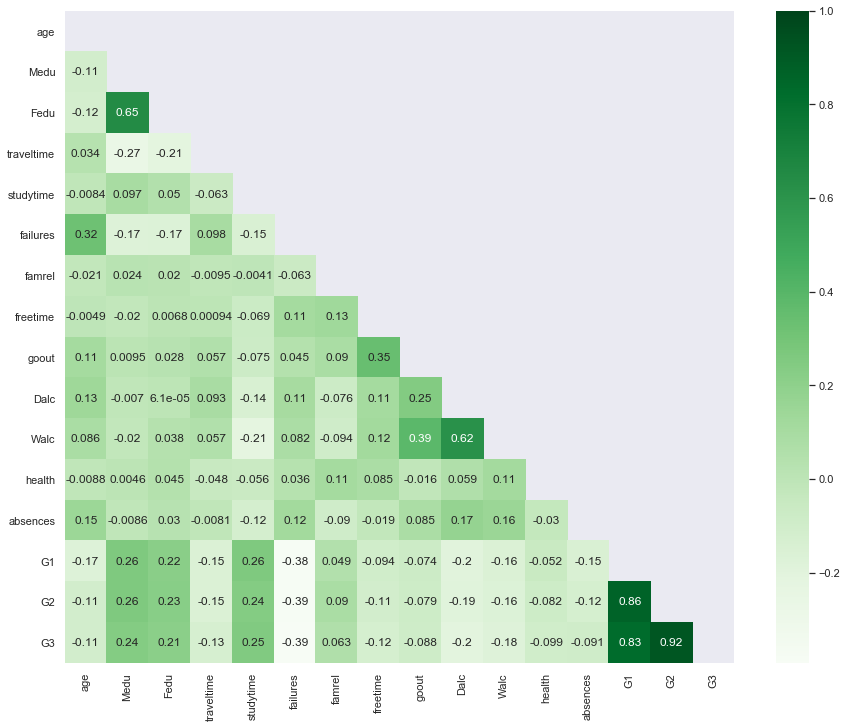

In [11]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

All features appear to have a fairly low correlation with the target label, except that G1 and G2 are highly correlated.

### Categorical Features

In [12]:
for col in data.columns:
    if col not in list(data._get_numeric_data()):
        print('{}: {}'.format(col, sorted(data[col].unique())))

school: ['GP', 'MS']
sex: ['F', 'M']
address: ['R', 'U']
famsize: ['GT3', 'LE3']
Pstatus: ['A', 'T']
Mjob: ['at_home', 'health', 'other', 'services', 'teacher']
Fjob: ['at_home', 'health', 'other', 'services', 'teacher']
reason: ['course', 'home', 'other', 'reputation']
guardian: ['father', 'mother', 'other']
schoolsup: ['no', 'yes']
famsup: ['no', 'yes']
paid: ['no', 'yes']
activities: ['no', 'yes']
nursery: ['no', 'yes']
higher: ['no', 'yes']
internet: ['no', 'yes']
romantic: ['no', 'yes']


This section has been displayed in the Attribute Information section. I computed this to make it easier for me to take care of it.

### Additional Information

In [13]:
in_trouble = data[data['G3'] < 10]

I will screen students with a G3 lower than 10.

In [14]:
threshold = defaultdict(dict)
for feature in data._get_numeric_data():
    threshold[feature]['lower'] = data[feature].quantile(0.25)
    threshold[feature]['upper'] = data[feature].quantile(0.75)
    threshold[feature]['mean'] = round(data[feature].mean(), 2)

#### DataFrame

In [15]:
trouble_df = defaultdict(list)
for index, row in in_trouble.iterrows():
    for feature in data._get_numeric_data():
        if row[feature] < threshold[feature]['lower']:
            trouble_df['Student ID'].append(index)
            trouble_df['Feature'].append(feature)
            trouble_df['Value'].append(row[feature])
            trouble_df['Mean'].append(threshold[feature]['mean'])
            
        elif row[feature] > threshold[feature]['upper']:
            trouble_df['Student ID'].append(index)
            trouble_df['Feature'].append(feature)
            trouble_df['Value'].append(row[feature])
            trouble_df['Mean'].append(threshold[feature]['mean'])
            
trouble_df = pd.DataFrame(trouble_df)

In [16]:
def frame(index):
    temp_df = trouble_df[trouble_df['Student ID'] == index].reset_index().drop(['index', 'Student ID'], axis=1)
    temp_df.columns.name = 'Student ID: {}'.format(index)
    return temp_df

#### Plot

In [17]:
trouble_plot = {}
for index, row in in_trouble.iterrows():
    features = trouble_df[trouble_df['Student ID'] == index]['Feature'].values
    
    student = pd.DataFrame(row[features]).T
    student['Legend'] = 'Student'
    
    mean = pd.DataFrame(data[features].mean()).T
    mean['Legend'] = 'Mean'
    
    bind = pd.concat([student, mean]).melt('Legend')
    trouble_plot[index] = bind

In [18]:
def plot(index):
    print('Student ID: {}'.format(index))
    sns.catplot(x='variable', y='value', hue='Legend', data=trouble_plot[index], kind='bar',
                palette=sns.color_palette(['blue', 'green']))
    plt.plot()

#### Evaluate Student's Problem

In [19]:
trouble_id = trouble_df['Student ID'].unique()
student_id = trouble_id[0]

# Use this to randomly issue student ID.
# student_id = np.random.choice(trouble_id)

In [20]:
frame(student_id)

Student ID: 18,Feature,Value,Mean
0,failures,3,0.22
1,freetime,5,3.18
2,goout,5,3.18
3,Walc,4,2.28
4,G1,8,11.40
5,G2,8,11.57
6,G3,7,11.91


Student ID: 18


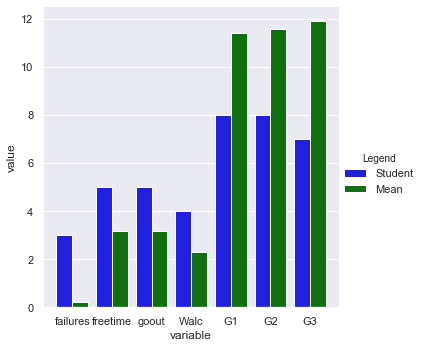

In [21]:
plot(student_id)

The student with ID 18 has the following problems compared to average students:
- Feel more failures in the previous class.
- Get more free time after school.
- Hang out with friends more often.
- Consume more alcohol on weekends.
- Has a lower value in the previous period.

## Modeling

In [22]:
import sys; sys.path.append('../')
# Model
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
# Feature Engineering
from fd_lib.feature_engineering import BestPair
# Model Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from fd_lib.feature_engineering import CustomFeature

I will try different algorithms to find out which one performs best, I am considering the following models:
- **Lasso** *(linear model with regularization terms)*
- **SVR** *(Support Vector Regressor)*
- **ExtraTreesRegressor** *(similar to RandomForestRegressor)*
- **XGBRegressor** *(Extreme Gradient Boosting Regressor)*

### Train Test Split

In [23]:
X = data.drop('G3', axis=1)
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Engineering

In [24]:
BestPair(X, y).mold()

[Product]   age & G2         | 0.882
[Product]   age & failures   | -0.391


The process found that the pair of:
- **age** and **G2** provide a high **positive** correlation.
- **age** and **failure** provide a good **negative** correlation.

In [25]:
features = Pipeline([
    ('new', CustomFeature([
        ('product', 'age', 'G2'),
        ('product', 'age', 'failures')
    ])),
    ('categorical', ColumnTransformer([
        ('encode', OneHotEncoder(), ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                                     'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                                     'activities', 'nursery', 'higher', 'internet', 'romantic'])
    ], remainder='passthrough'))
])

### Model Selection

In [26]:
estimators = {
    'Lasso': Lasso(),
    'SVR': SVR(),
    'ET': ExtraTreesRegressor(),
    'XGB': XGBRegressor(),
}

In [27]:
for name, estimator in estimators.items():
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(estimator, features.fit_transform(X), y, cv=cv, n_jobs=-1)
    print('{}: {:.3f}'.format(name, scores.mean()))

Lasso: 0.786
SVR: 0.774
ET: 0.824
XGB: 0.824


The observation shows that **ExtraTrees** and **XGB** are the best performers.

### Fitting Model

I'll be using 3 times more **n_iter** on *XGB* than *ExtraTrees*. This is because **XGB** typically will work **faster**.

#### 1. ExtraTreesRegressor

In [28]:
params = {
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

In [29]:
est_ET = Pipeline([
    ('features', features),
    ('regressor', RandomizedSearchCV(ExtraTreesRegressor(), param_distributions=params,
                                     n_iter=150, cv=5, n_jobs=-1, random_state=0, verbose=1))
])
est_ET.fit(X_train, y_train);

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  8.6min finished


In [30]:
best_ET = est_ET.named_steps['regressor'].best_params_
best_ET

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6}

#### 2. XGBRegressor

In [31]:
params = {
    'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [3, 4, 6, 8, 10],
    'subsample': [0.5, 0.75, 0.9],
    'min_child_weight': [3, 5, 7, 10],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'objective': ['reg:squarederror']
}

In [32]:
est_XGB = Pipeline([
    ('features', features),
    ('regressor', RandomizedSearchCV(XGBRegressor(), param_distributions=params,
                                     n_iter=450, cv=5, n_jobs=-1, random_state=0, verbose=1))
])
est_XGB.fit(X_train, y_train);

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2247 out of 2250 | elapsed:  4.2min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  4.2min finished


In [33]:
best_XGB = est_XGB.named_steps['regressor'].best_params_
best_XGB

{'subsample': 0.9,
 'objective': 'reg:squarederror',
 'min_child_weight': 7,
 'max_depth': 3,
 'gamma': 0.3,
 'eta': 0.15,
 'colsample_bytree': 0.4}

### Scoring

In [34]:
score = pd.DataFrame({'Train': [est_ET.score(X_train, y_train),
                                est_XGB.score(X_train, y_train)],
                      'Test': [est_ET.score(X_test, y_test),
                               est_XGB.score(X_test, y_test)]},
                    
                     index=['ExtraTrees', 'XGB'])

score.columns.name = 'R2'
score.index.name = 'Model'
score

R2,Train,Test
Model,,
ExtraTrees,0.919165,0.865450
XGB,0.938922,0.836481


In [35]:
columns = [('Predict', 'ET'), ('Predict', 'XGB'), ('True', '')]

predict = pd.DataFrame({'ET': est_ET.predict(X_test).round(0).astype(int),
                        'XGB': est_XGB.predict(X_test).round(0).astype(int),
                        'True': y_test}).sample(5)

predict.columns = pd.MultiIndex.from_tuples(columns)
predict

Predict     True
         ET XGB     
449      13  13   13
628      11  11   12
266      15  15   14
541      10  10   11
278      12  13   13

Both models have done a great job. Their predictions are very close to the true values.

### Time

#### 1. ExtraTreesRegressor

In [36]:
%%timeit
Pipeline([
    ('features', features),
    ('regressor', ExtraTreesRegressor(**best_ET))
]).fit(X_train, y_train)

5.7 s ± 2.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
est_ET.predict(X_test)

509 ms ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 2. XGBRegressor

In [38]:
%%timeit
Pipeline([
    ('features', features),
    ('regressor', XGBRegressor(**best_XGB))
]).fit(X_train, y_train)

525 ms ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%%timeit
est_XGB.predict(X_test)

87.9 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Overview

**XGBRegressor** has done a better job in terms of time complexity. The training time is about **10 times faster** and the prediction time is about **5 times faster**. Note that each loop can perform differently.

### Another Dataset

In [40]:
X_2 = mat_data.drop('G3', axis=1)
y_2 = mat_data['G3']

In [41]:
pd.DataFrame({'Predict': est_XGB.predict(X_2).round(0).astype(int), 'True': y_2}).sample(5)

,Predict,True
131,3,0
127,9,9
356,13,13
324,16,15
339,11,10


In [42]:
est_XGB.score(X_2, y_2)

0.8006170433486284

The model with the same set of hyperparameters as previously trained has worked well on different data sets as well. Note that these two data sets have a similar structure.

## Conclusion

I have created:
- Two functions that help you gain insight into students who have low marks. This function accepts the **student ID** as a parameter and produces a student retention factor in the form of:
  - **frame()** DataFrame *(table)*
  - **plot()** graphical representation
- Two models that predict students' final grades. I would probably choose **XGBRegressor** over ExtraTreesRegressor. Although it gives a slightly lower score, it is **cheaper** in terms of time complexity.